## Think Stats v2

[PDF of the Book](https://greenteapress.com/thinkstats2/thinkstats2.pdf)

## Live Colab Notebooks (no setup needed)
- [Chapter 1](https://colab.research.google.com/github/AllenDowney/ThinkStats2/blob/master/code/chap01ex.ipynb)
- [Chapter 2](https://colab.research.google.com/github/AllenDowney/ThinkStats2/blob/master/code/chap02ex.ipynb)
- [Chapter 3](https://colab.research.google.com/github/AllenDowney/ThinkStats2/blob/master/code/chap03ex.ipynb)
- [Chapter 4](https://colab.research.google.com/github/AllenDowney/ThinkStats2/blob/master/code/chap04ex.ipynb)
- [Chapter 5](https://colab.research.google.com/github/AllenDowney/ThinkStats2/blob/master/code/chap05ex.ipynb)
- [Chapter 6](https://colab.research.google.com/github/AllenDowney/ThinkStats2/blob/master/code/chap06ex.ipynb)

## Comparing Multiple Distributions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Notation for Dice Rolling Form
- `1d2` means to flip a coin (2 sided die)
- `3d2` means to flip and sum the 3 coin results
- `10d6` means roll 10 six sided dice and sum the resuls
- `2d10` means to roll and sum two dice with ten sides

In [80]:
n_trials = 10_000

In [158]:
def roll(form, n_trials):
    """
    Returns a Series of roll sums when provided a dice-roll form and number of trials
    """
    # split the form
    pieces = form.split("d")
    
    n_dice = int(pieces[0])
    n_sides = int(pieces[1])
    
    # Produce the set of all rolls
    rolls = np.random.randint(1, n_sides + 1, size=(n_trials, n_dice))
    
    # Summing this 
    sums = rolls.sum(axis=1)
    
    return pd.Series(sums)

In [160]:
a = roll("4d10", n_trials)
b = roll("2d20", n_trials)

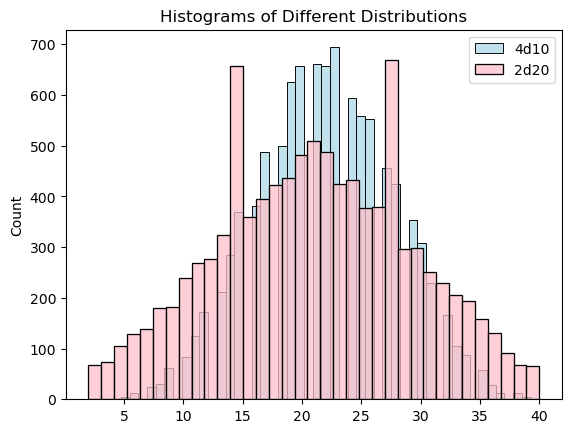

In [164]:
plt.title("Histograms of Different Distributions")
sns.histplot(data = a, label = "4d10", color="lightblue")
sns.histplot(data = b, label = "2d20", color="pink")
plt.legend()

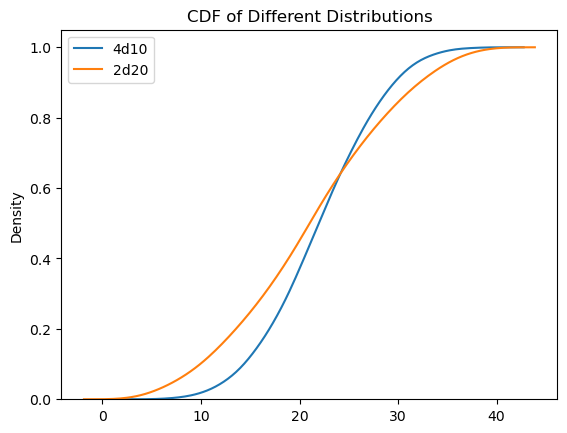

In [163]:
plt.title("CDF of Different Distributions")
sns.kdeplot(data = a, cumulative = True, label = "4d10")
sns.kdeplot(data = b, cumulative = True, label = "2d20")
plt.legend()
plt.show()

## Comparing T-Distribution to Normal Distribution w/ same mean

Degrees of freedom 1


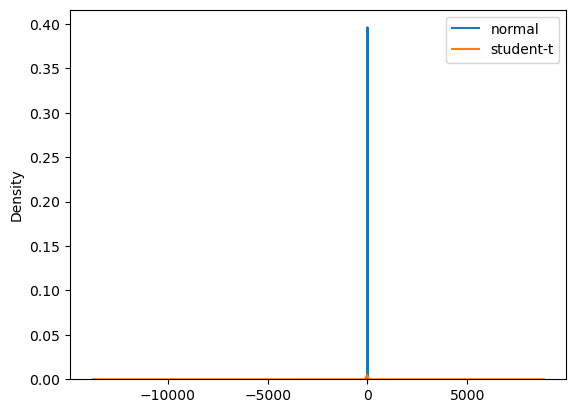

-----
Degrees of freedom 2


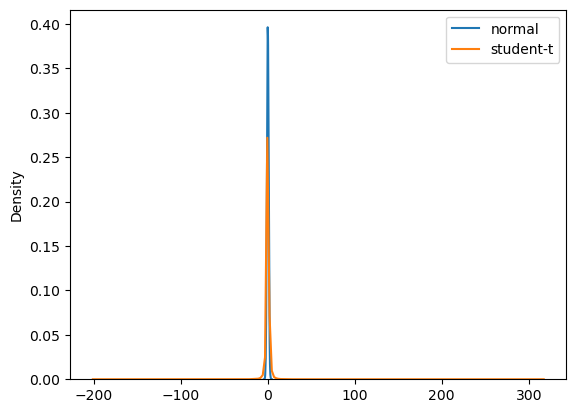

-----
Degrees of freedom 3


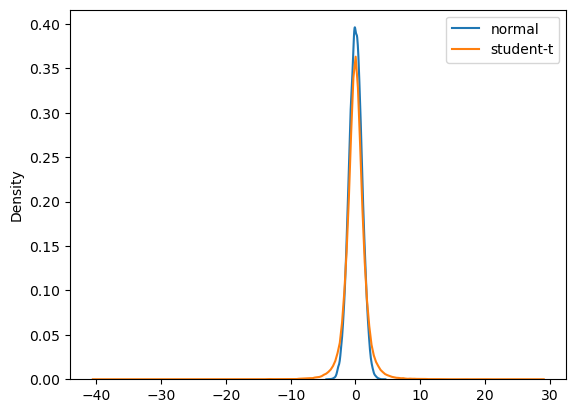

-----
Degrees of freedom 4


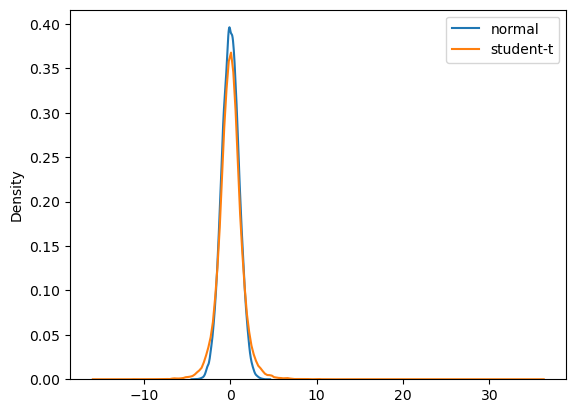

-----
Degrees of freedom 5


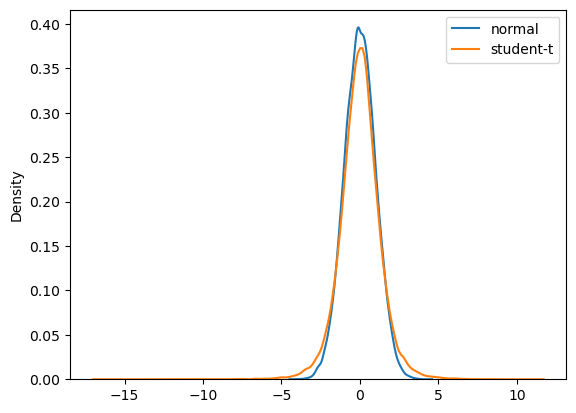

-----
Degrees of freedom 6


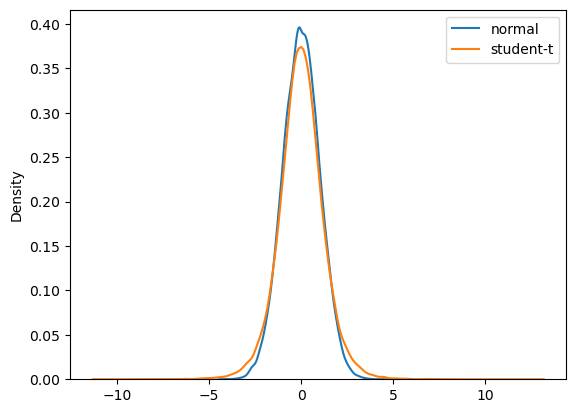

-----
Degrees of freedom 7


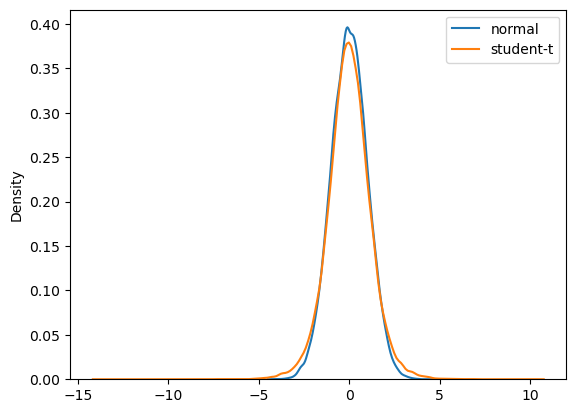

-----
Degrees of freedom 8


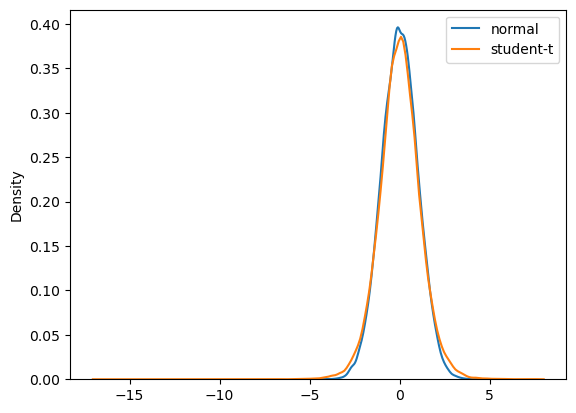

-----
Degrees of freedom 9


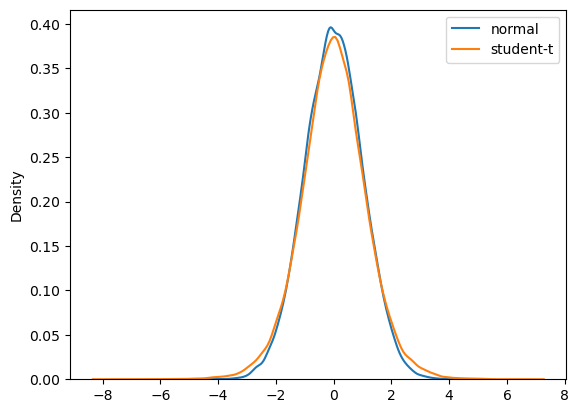

-----
Degrees of freedom 10


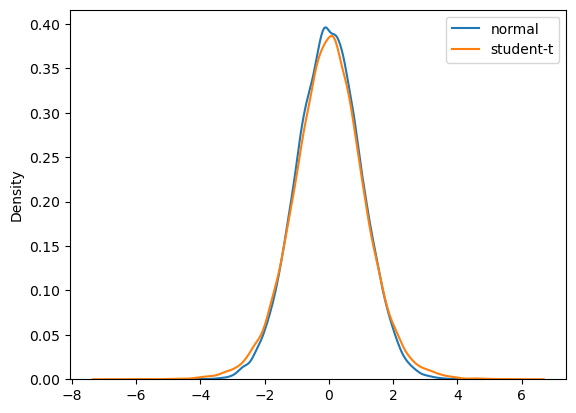

-----
Degrees of freedom 15


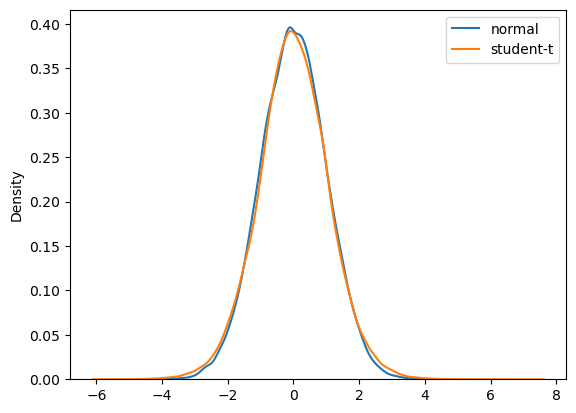

-----
Degrees of freedom 20


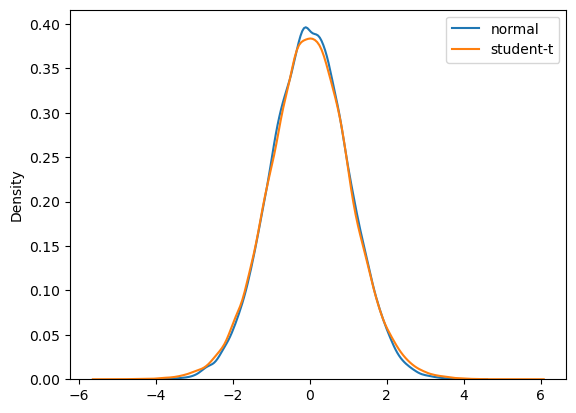

-----
Degrees of freedom 30


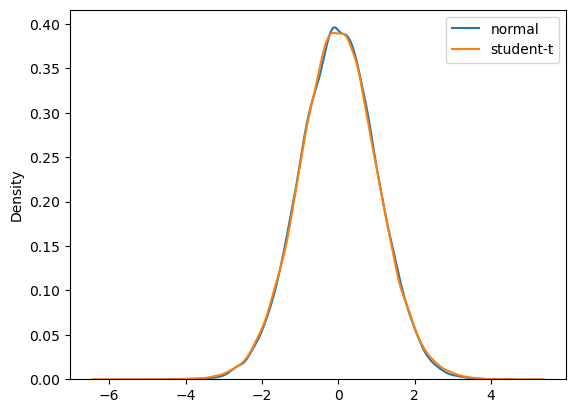

-----


In [218]:
normal = stats.norm(0, 1)
normal_numbers = normal.rvs(50_000)
normal_numbers[:10]

for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]:
    student_numbers = stats.t(i).rvs(50_000)
    print("Degrees of freedom", i)
    sns.kdeplot(data = normal_numbers, cumulative = False, label = "normal")
    sns.kdeplot(data = student_numbers, cumulative = False, label = "student-t")
    plt.legend()
    plt.show()
    print("-----")

### Comparing CDFs from t-distribution and normal
- Takeaways:
    - t-Distribution has much fatter tails with lower degrees of freedom
    - As degrees of freedom in t-distribution increases, t

Degrees of freedom 1


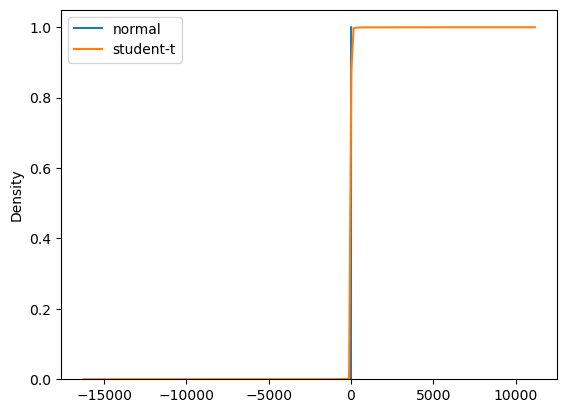

-----
Degrees of freedom 2


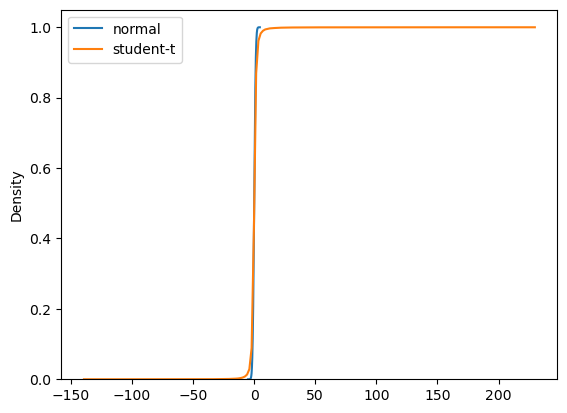

-----
Degrees of freedom 3


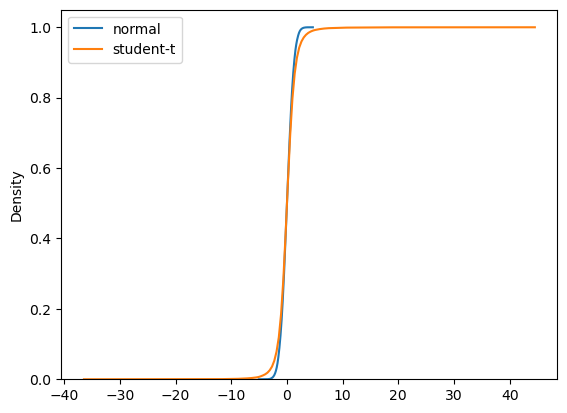

-----
Degrees of freedom 4


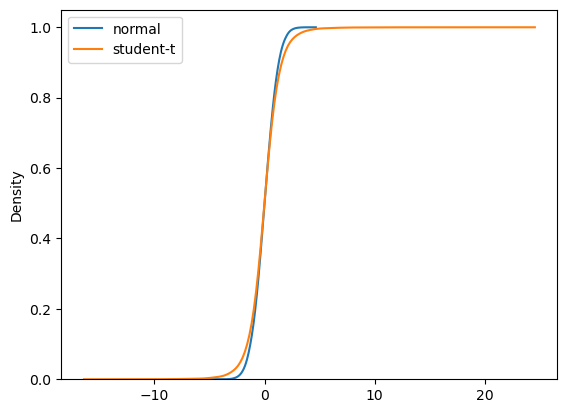

-----
Degrees of freedom 5


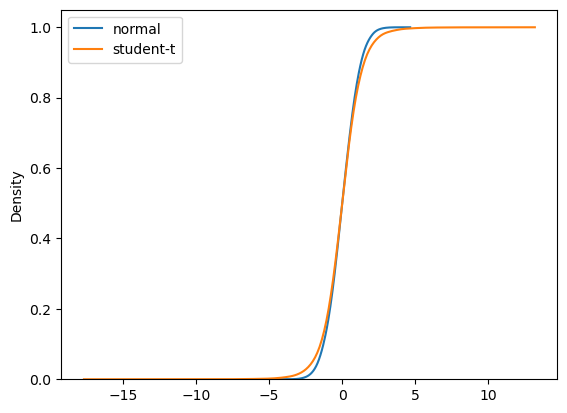

-----
Degrees of freedom 6


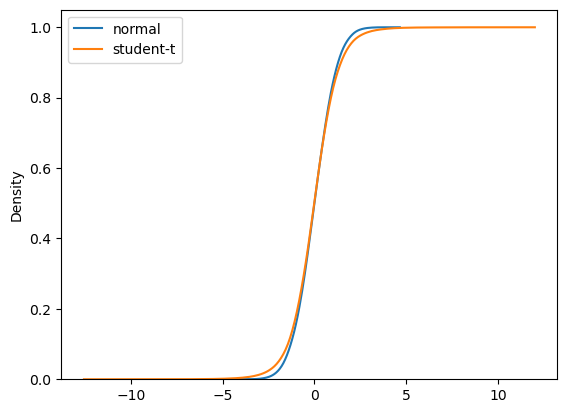

-----
Degrees of freedom 7


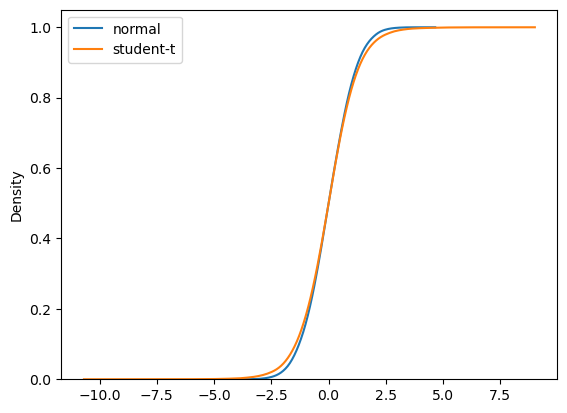

-----
Degrees of freedom 8


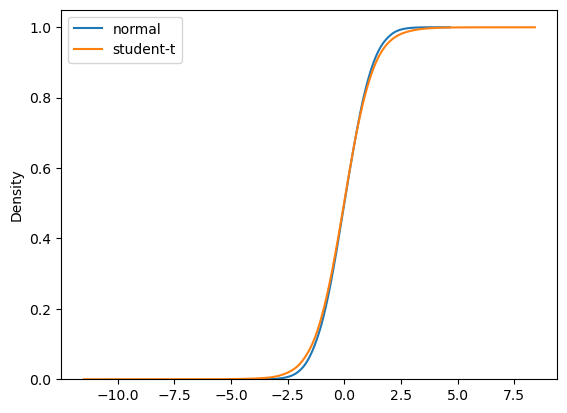

-----
Degrees of freedom 9


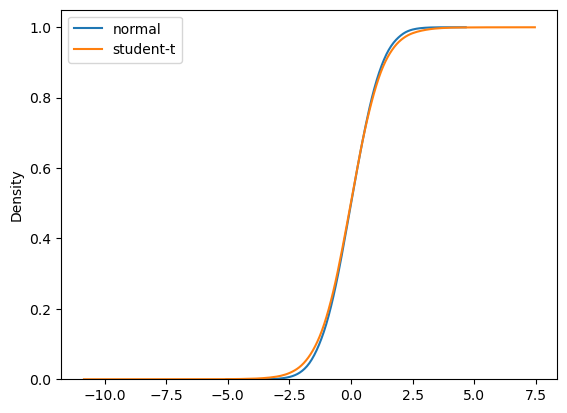

-----
Degrees of freedom 10


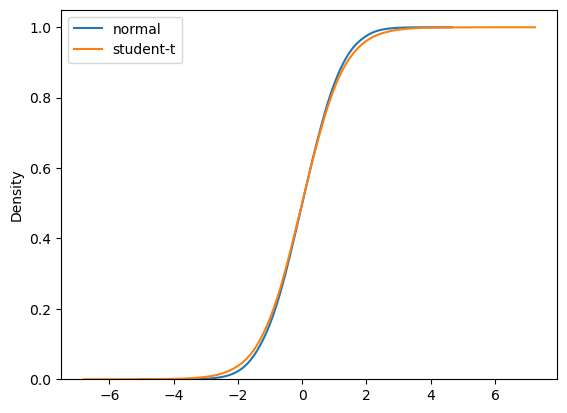

-----
Degrees of freedom 15


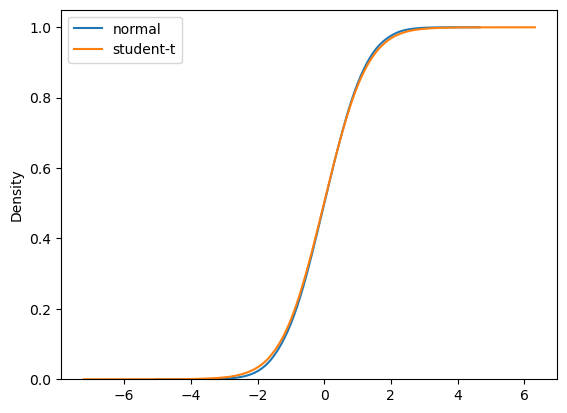

-----
Degrees of freedom 20


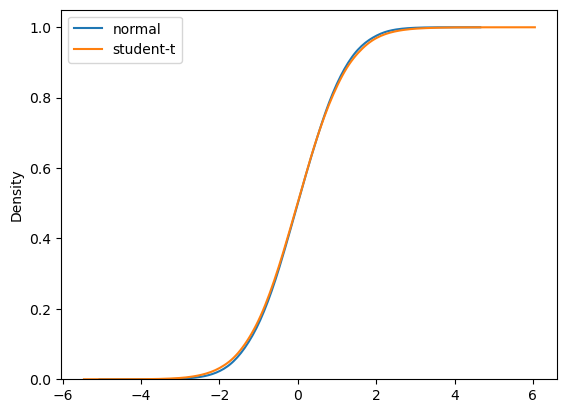

-----
Degrees of freedom 30


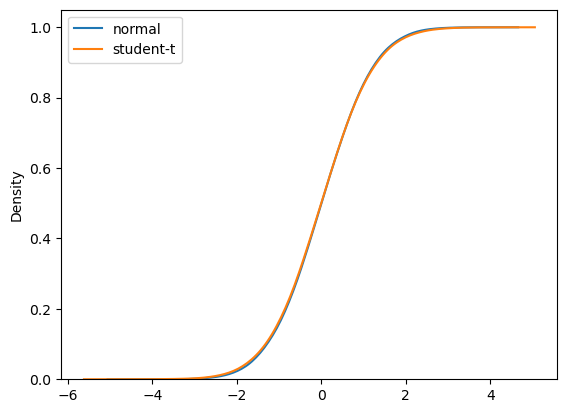

-----


In [219]:
normal = stats.norm(0, 1)
normal_numbers = normal.rvs(50_000)
normal_numbers[:10]

for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]:
    student_numbers = stats.t(i).rvs(50_000)
    print("Degrees of freedom", i)
    sns.kdeplot(data = normal_numbers, cumulative = True, label = "normal")
    sns.kdeplot(data = student_numbers, cumulative = True, label = "student-t")
    plt.legend()
    plt.show()
    print("-----")